# ML Project #1

# Customer Churn Prediction

---

## Outline
#### 1. Data cleaning and Visualization
#### 2. Feature engineering 
#### 3. Splittiing the Data and Oversampling
#### 4. Modeling Training and Evalution 

---

Libraries and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

Reading the dataset

In [2]:
df = pd.read_csv('P1_Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


---

## 1. Data Cleaning

1.1. Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


From the above stats, it shows that there are no null values in any of the columns

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

1.2. Visualization 

Outliers Check

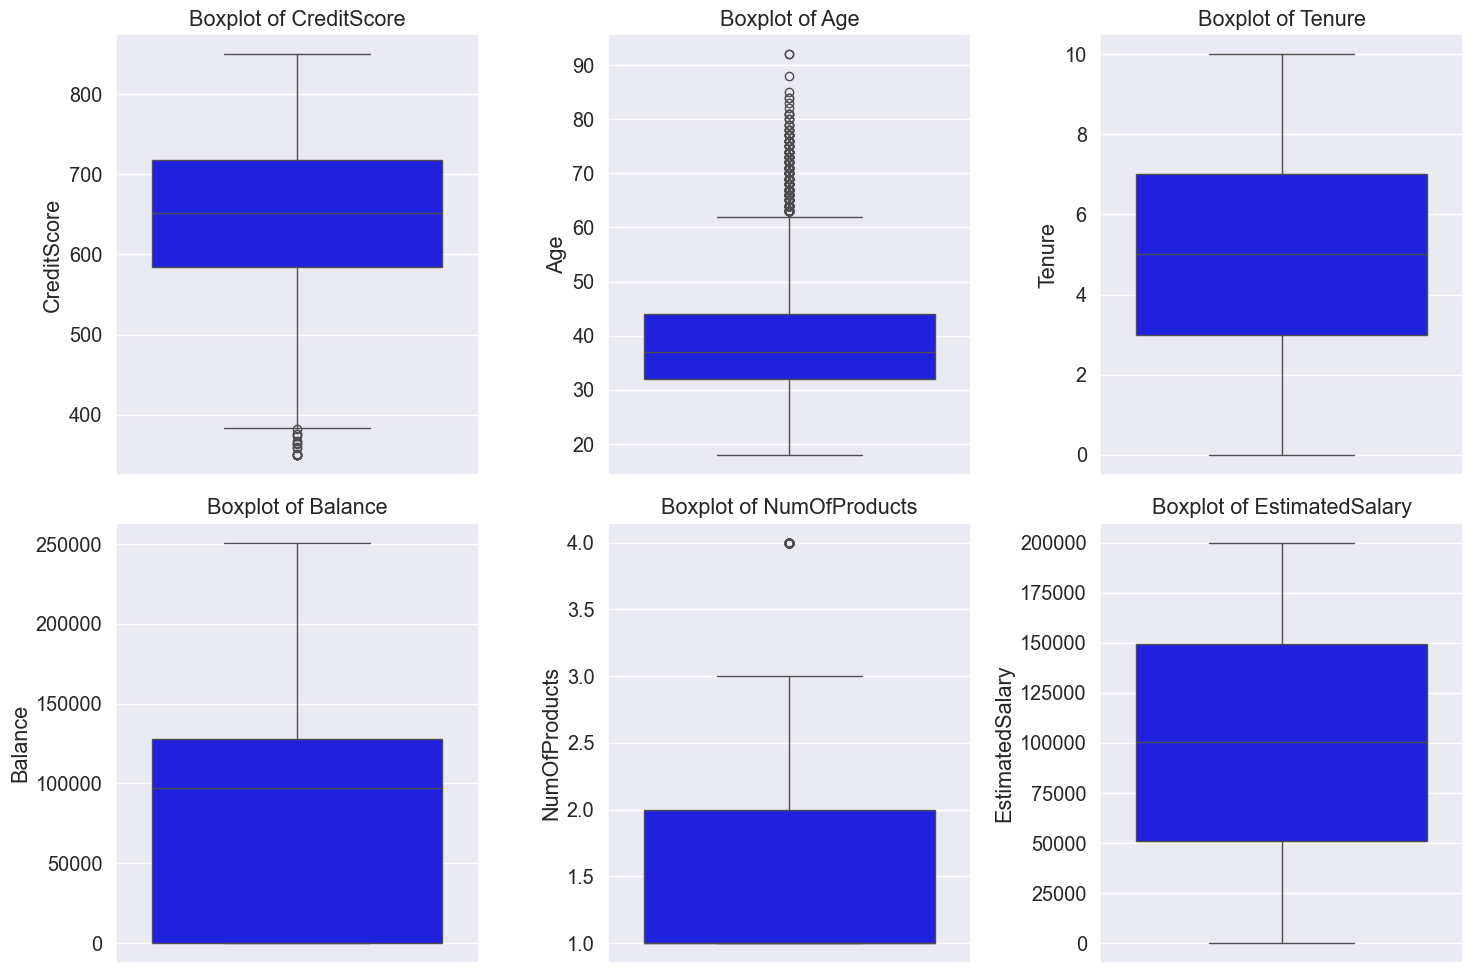

In [6]:
# List of numeric columns to plot
numeric_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

# Create boxplots for each numeric column
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Create a 2-row, 4-column grid for subplots
    sns.boxplot(data=df, y=col, color='blue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

Age Distribution

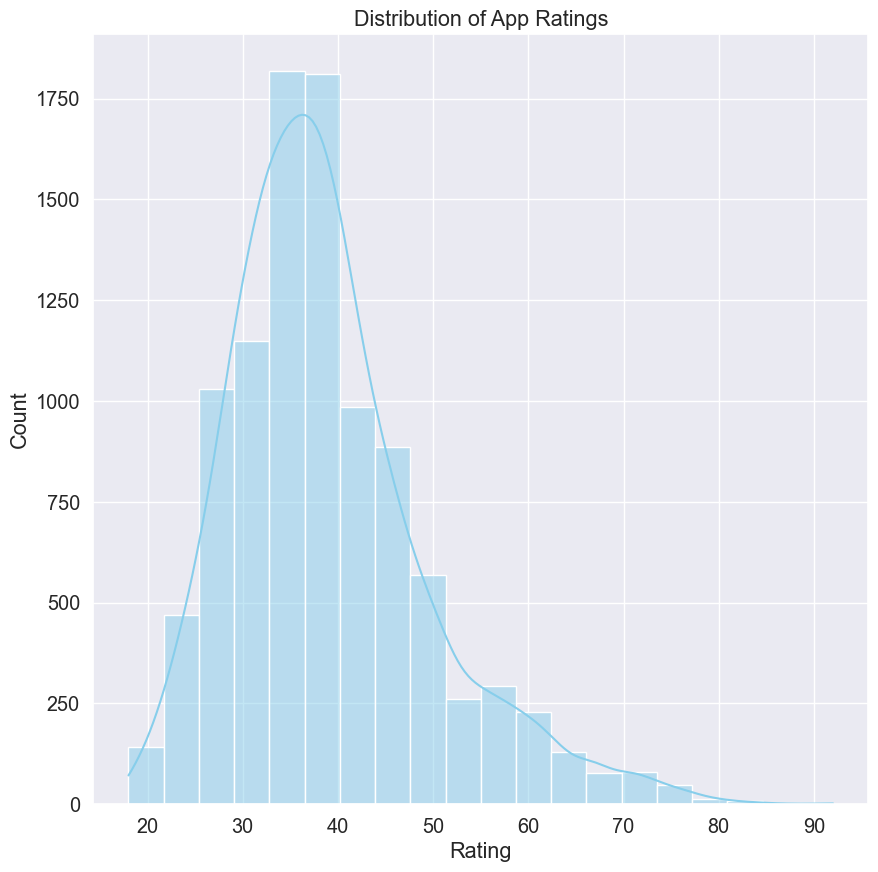

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
766,767,15810864,Williamson,700,France,Female,82,2,0.00,2,0,1,182055.36,0
2458,2459,15813303,Rearick,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
3033,3034,15578006,Yao,787,France,Female,85,10,0.00,2,1,1,116537.96,0
3387,3388,15798024,Lori,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,0
3531,3532,15653251,Hickey,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
4931,4932,15772341,Hs?eh,682,Germany,Male,81,6,122029.15,1,1,1,50783.88,0
6443,6444,15764927,Rogova,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,6760,15660878,T'ien,705,France,Male,92,1,126076.24,2,1,1,34436.83,0
7526,7527,15800554,Perry,850,France,Female,81,1,0.00,2,1,1,59568.24,0
7956,7957,15731569,Hudson,850,France,Male,81,5,0.00,2,1,1,44827.47,0


In [7]:
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
# Checking for age bigger than 80 (there are two aging 92)
df[df['Age'] > 80]

Categorical Features

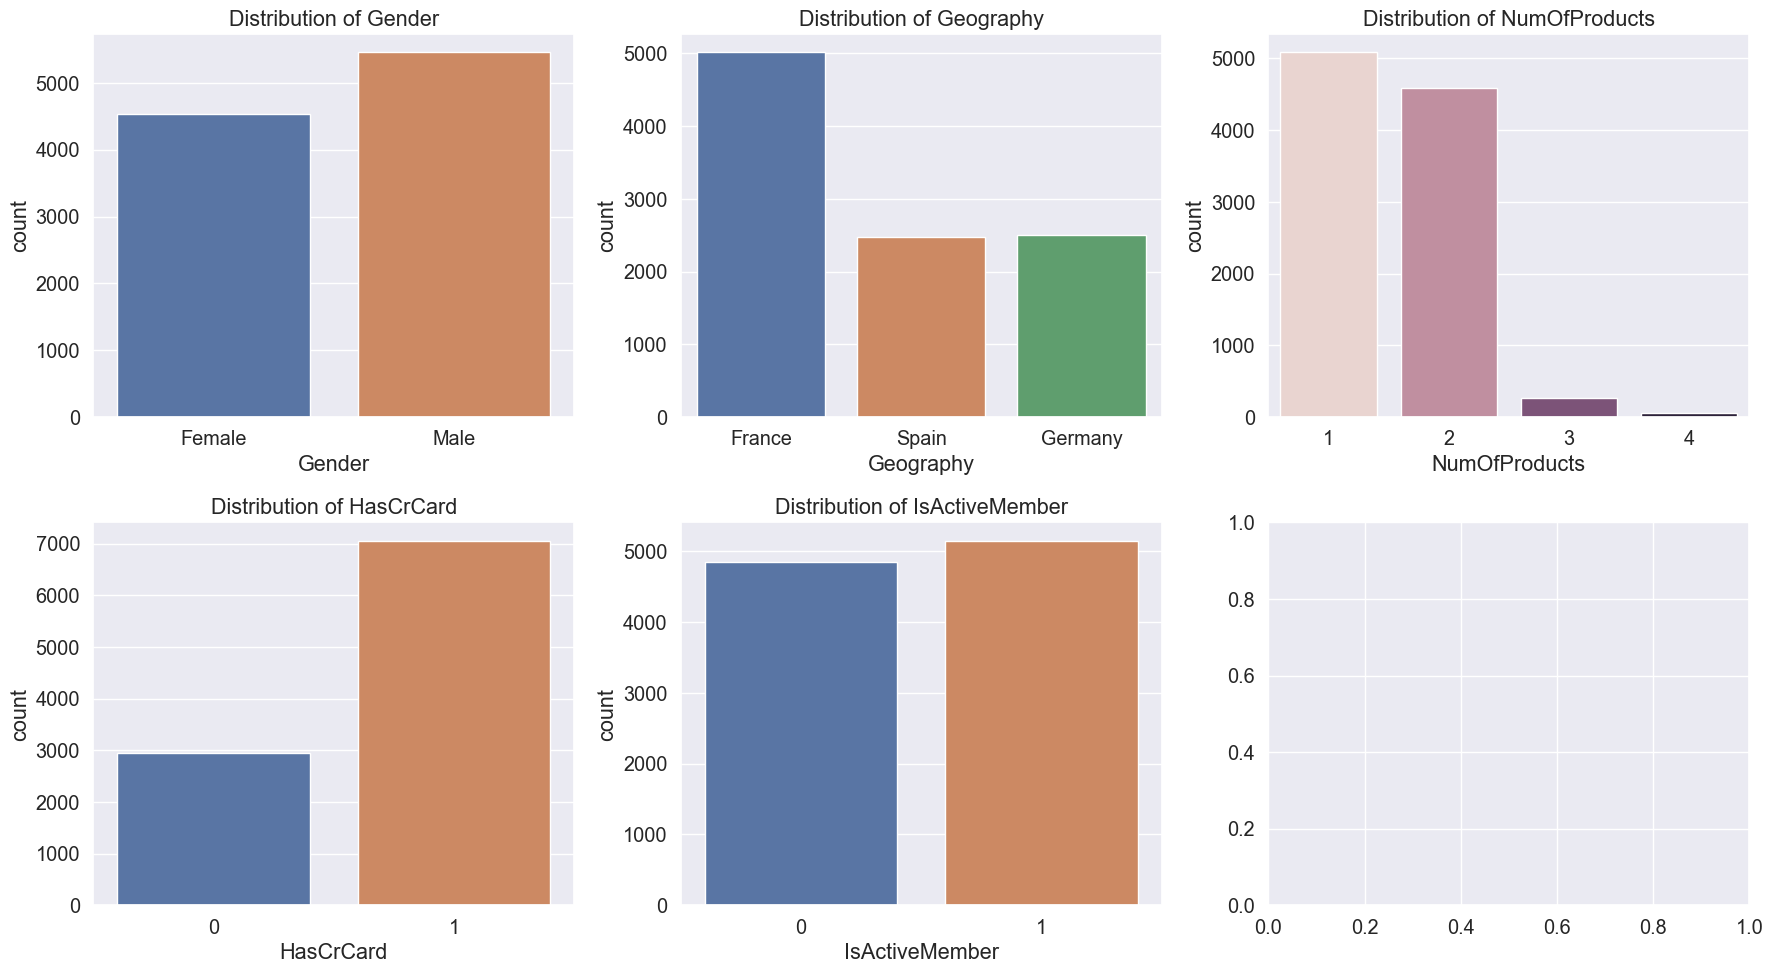

In [8]:
# Define the categorical features
categorical_features = ["Gender", "Geography", "NumOfProducts", "HasCrCard", "IsActiveMember"]

# Create subplots for each categorical variable
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Adjusting grid size

for i, feature in enumerate(categorical_features):
    row, col = divmod(i, 3)
    sns.countplot(x=df[feature], hue=df[feature], legend=False, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

Target Variable Distribution

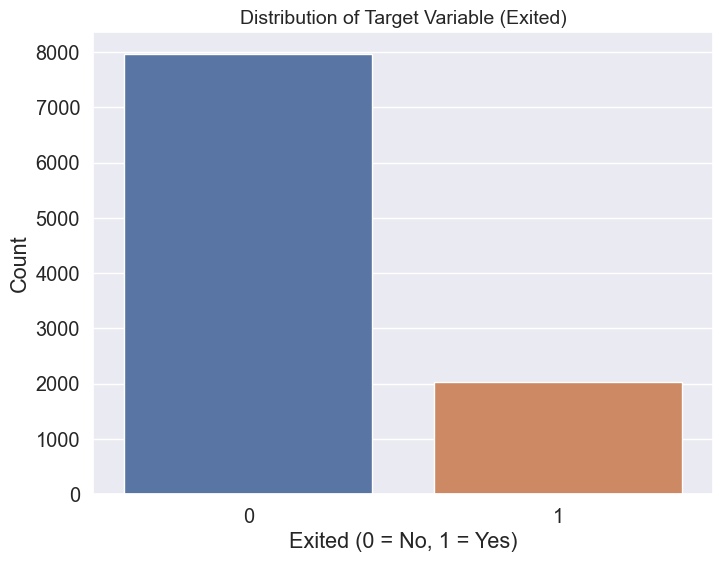

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df["Exited"], hue=df["Exited"], legend=False)
plt.title("Distribution of Target Variable (Exited)", fontsize=14)
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")

plt.show()

# Check class distribution
print(df["Exited"].value_counts(normalize=True) * 100)  # Display percentage


---

From the shown percentages, there's a class imbalance here, which may affect predicitions to be towards "not churned", so we will use SMOTE when splitting the data

---

#### Correlation Visualization

Encoding of Gender and Geography

In [10]:
# Encode 'Gender'
# Here we use binary encoding (label)
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])  # 'Female' → 0, 'Male' → 1
df[["Gender"]]

,Gender
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [11]:
# Encode 'Geography'
# Here we use One-Hot Encoding (Multi-Class -> Use One-Hot Encoding)
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)
# Display result
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


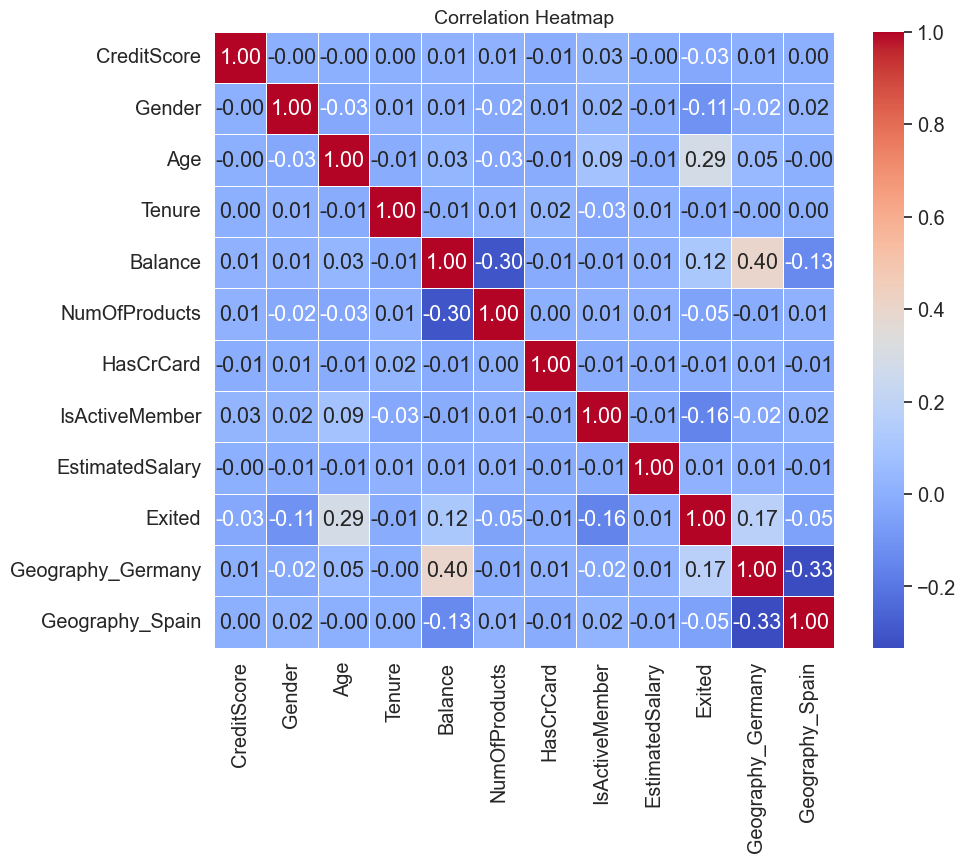

In [12]:
# correlation matrix
# Drop non-numeric columns
df_numeric = df.drop(columns=["RowNumber", "CustomerId", "Surname"])
corr_matrix = df_numeric.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


As seen from above, there is no high correlation between certain objects, thus no need to drop any extra features

---

## 2. Feature Engineering

2.1. Dropping Irrelevant Columns

In [13]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,True,False


2.2. Scaling features to be used in certain algorithms

In [14]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[["CreditScore", "Age", "Balance", "EstimatedSalary"]] = scaler.fit_transform(df_scaled[["CreditScore", "Age", "Balance", "EstimatedSalary"]])

# Scaled and saved as 'df_scaled'


---

## 3. Splitting the dataset

In [15]:
from imblearn.over_sampling import SMOTE

3.1. Split and apply SMOTE

In [16]:
x = df_scaled.drop(columns=["Exited"])  # Features
y = df_scaled["Exited"]  # Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("After SMOTE:\n", y_train_resampled.value_counts(normalize=True) * 100)


After SMOTE:
 Exited
1    50.0
0    50.0
Name: proportion, dtype: float64


---

## 4. Model Evaluation

4.1. Importing libraries

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import joblib
import os
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report


4.2. Initialize and train models

In [35]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=6),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
}

model_predictions = {} # To store the predictions

for name, model in models.items():
    model.fit(x_train, y_train)  
    y_pred = model.predict(x_test)  
    try:
        y_proba = model.predict_proba(x_test)[:, 1]
    except AttributeError:
        y_proba = None

    model_predictions[name] = {"y_pred": y_pred, "y_proba": y_proba}

4.3. Evaluate the models

In [36]:
evaluation_results = {}

for name, preds in model_predictions.items():
    y_pred = preds["y_pred"]
    y_proba = preds["y_proba"]

    evaluation_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    }

results_df = pd.DataFrame(evaluation_results).T  #Converts results into a dataframe to visualize it
print(results_df)

               Accuracy  Precision    Recall  F1-Score   ROC-AUC
KNN              0.8295   0.742647  0.248157  0.372007  0.765524
Naive Bayes      0.8200   0.600000  0.346437  0.439252  0.784287
SVM              0.8220   0.904762  0.140049  0.242553  0.838763
Decision Tree    0.8560   0.787440  0.400491  0.530945  0.842144


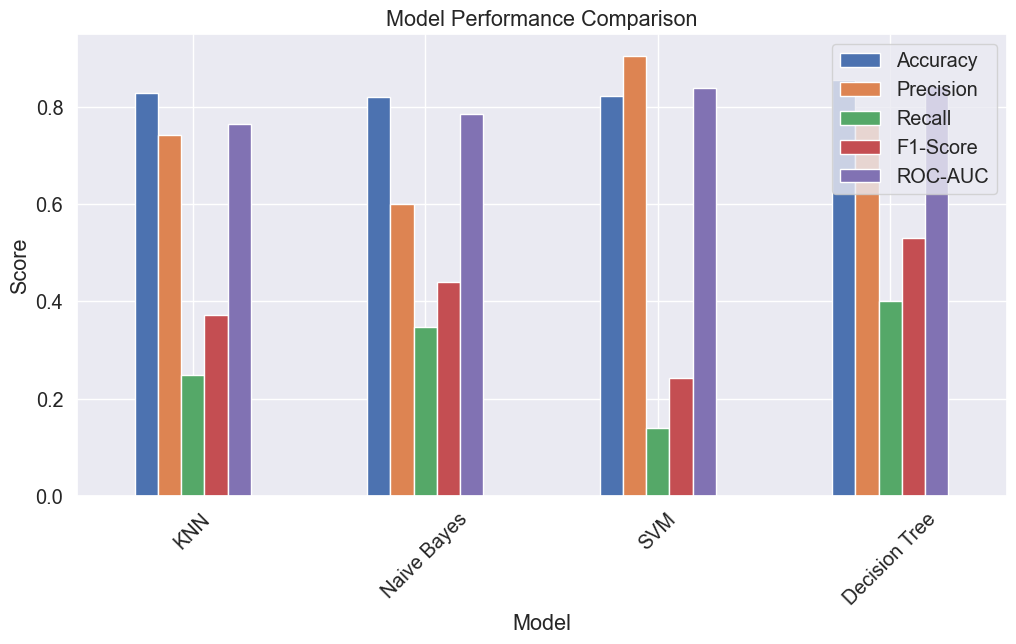

In [37]:
results_df.plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.show()

4.3. Store and save models

In [38]:
# To store models
if not os.path.exists("saved_models"):
    os.makedirs("saved_models")

# Save each trained model
for name, model in models.items():
    joblib.dump(model, f"saved_models/{name}.pkl")

print("All models have been saved successfully!")


All models have been saved successfully!


4.4. Example of using the saved model

In [ ]:
dt_model = joblib.load("saved_models/Decision Tree.pkl")
df_data = df_scaled.drop(columns=["Exited"])

# Import the data
""" new_data = ___
prediction = dt_model.predict(new_data)
print("Churn Prediction:", prediction[0])   """

Churn Prediction: 0
